In [15]:
# STEP 1
from google.colab import files
uploaded = files.upload()

import pandas as pd

# Load the dataset
df = pd.read_csv('diabetes.csv')

# First 5 rows
df.head()

# Data types and missing values
df.info()

# Summary stats
df.describe()

Saving diabetes.csv to diabetes (2).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [16]:
# STEP 2A
# Check structure
df.info()

# Summary statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [17]:
# STEP 2B
# Check for zero values in each column
(df == 0).sum()

,0
Pregnancies,111
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,500


In [18]:
# STEP 2C
# Flag likely missing values
df['insulin_missing'] = df['Insulin'] == 0
df['skin_missing'] = df['SkinThickness'] == 0
df['bp_missing'] = df['BloodPressure'] == 0

# Preview
df[['Insulin', 'insulin_missing']].head(5)

,Insulin,insulin_missing
0,0,True
1,0,True
2,0,True
3,94,False
4,168,False


In [19]:
# STEP 3A
# Prevalence
prevalence = df['Outcome'].mean() * 100
print(f"Prevalence of diabetes: {prevalence:.2f}%")

Prevalence of diabetes: 34.90%


In [20]:
# STEP 3B
# Define binning
# Age
age_bins = [20, 29, 39, 49, 59, 100]
age_labels = ['20–29', '30–39', '40–49', '50–59', '60+']
df['age_group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# BMI
bmi_bins = [0, 18.4, 24.9, 29.9, 33, 100]
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese', 'Severely Obese']
df['bmi_group'] = pd.cut(df['BMI'], bins=bmi_bins, labels=bmi_labels)

# Pregnancies
preg_bins = [-1, 0.5, 1.5, 2.5, 3.5, 20]
preg_labels = ['0', '1', '2', '3', '4+']
df['preg_group'] = pd.cut(df['Pregnancies'], bins=preg_bins, labels=preg_labels)

# Glucose
glucose_bins = [0, 99, 125, 200]
glucose_labels = ['Normal', 'Pre-diabetic', 'Diabetic']
df['glucose_group'] = pd.cut(df['Glucose'], bins=glucose_bins, labels=glucose_labels)

# Insulin
insulin_bins = [0, 15, 100, 200, 1000]
insulin_labels = ['Very Low', 'Low', 'Moderate', 'High']
df['insulin_group'] = pd.cut(df['Insulin'], bins=insulin_bins, labels=insulin_labels)

# DPF
# Create quartile bins (no categorization available)
df['dpf_group'] = pd.qcut(df['DiabetesPedigreeFunction'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Function to summarize prevalence
def prevalence_by_group(var):
    return df.groupby(var, observed=True)['Outcome'].mean().round(3) * 100

# Calculate prevalence across all groups
age_prev = prevalence_by_group('age_group')
bmi_prev = prevalence_by_group('bmi_group')
preg_prev = prevalence_by_group('preg_group')
glucose_prev = prevalence_by_group('glucose_group')
insulin_prev = prevalence_by_group('insulin_group')
dpf_prev = prevalence_by_group('dpf_group')

print(age_prev)
print(bmi_prev)
print(preg_prev)
print(glucose_prev)
print(insulin_prev)
print(dpf_prev)

age_group
20–29    21.2
30–39    46.1
40–49    55.1
50–59    59.6
60+      28.1
Name: Outcome, dtype: float64
bmi_group
Underweight        0.0
Normal             6.9
Overweight        22.3
Obese             46.6
Severely Obese    46.3
Name: Outcome, dtype: float64
preg_group
0     34.2
1     21.5
2     18.4
3     36.0
4+    45.1
Name: Outcome, dtype: float64
glucose_group
Normal           7.3
Pre-diabetic    27.7
Diabetic        59.3
Name: Outcome, dtype: float64
insulin_group
Very Low    50.0
Low         12.1
Moderate    41.1
High        54.1
Name: Outcome, dtype: float64
dpf_group
Q1    25.5
Q2    33.3
Q3    32.3
Q4    48.4
Name: Outcome, dtype: float64


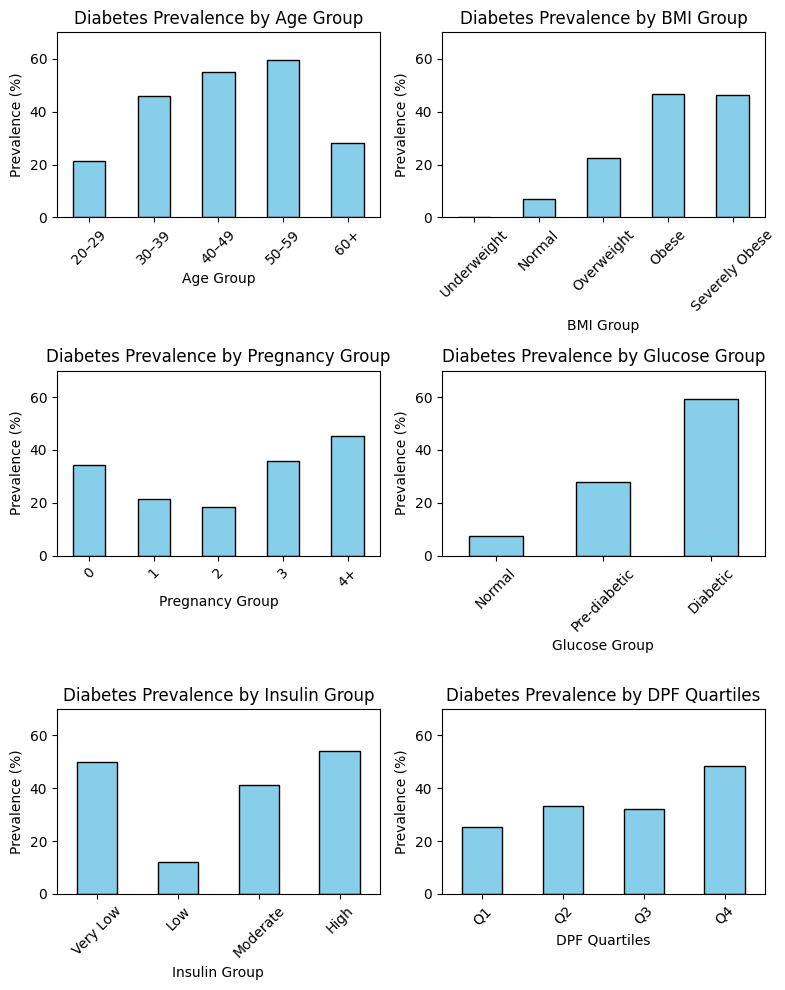

In [21]:
# STEP 3C
import matplotlib.pyplot as plt

# Group prevalence series in a dictionary
grouped_prevalences = {
    'Age Group': age_prev,
    'BMI Group': bmi_prev,
    'Pregnancy Group': preg_prev,
    'Glucose Group': glucose_prev,
    'Insulin Group': insulin_prev,
    'DPF Quartiles': dpf_prev
}

# Size of entire figure (w x h in inches)
plt.figure(figsize=(8, 10))

# Loop through the dictionary and create subplot per variable
for i, (label, series) in enumerate(grouped_prevalences.items(), 1):
    # Create a subplot: 3 rows, 2 columns, position i
    plt.subplot(3, 2, i)
    series.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Diabetes Prevalence by {label}')
    plt.ylabel('Prevalence (%)')
    plt.xlabel(label)
    # Standardize y-axis to 0–70% for consistency
    plt.ylim(0, 70)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [22]:
# STEP 4
# RR and OR for two groups
def calc_rr_or(df, group_var, ref_group, comp_group):
    # Get counts
    exposed = df[df[group_var] == comp_group]['Outcome']
    unexposed = df[df[group_var] == ref_group]['Outcome']

    # Calculate risk
    risk_exp = exposed.mean()
    risk_unexp = unexposed.mean()
    rr = risk_exp / risk_unexp

    # Calculate odds
    odds_exp = risk_exp / (1 - risk_exp)
    odds_unexp = risk_unexp / (1 - risk_unexp)
    or_val = odds_exp / odds_unexp

    # Round
    return round(rr, 2), round(or_val, 2)

# Groups for each major variable
rr_age, or_age = calc_rr_or(df, 'age_group', '20–29', '40–49')
rr_bmi, or_bmi = calc_rr_or(df, 'bmi_group', 'Normal', 'Obese')
rr_glucose, or_glucose = calc_rr_or(df, 'glucose_group', 'Normal', 'Diabetic')
rr_preg, or_preg = calc_rr_or(df, 'preg_group', '1', '4+')

# Display results
print("Risk Ratios and Odds Ratios:")
print(f"Age (40–49 vs 20–29): RR = {rr_age}, OR = {or_age}")
print(f"BMI (Obese vs Normal): RR = {rr_bmi}, OR = {or_bmi}")
print(f"Glucose (Diabetic vs Normal): RR = {rr_glucose}, OR = {or_glucose}")
print(f"Pregnancies (4+ vs 1): RR = {rr_preg}, OR = {or_preg}")

Risk Ratios and Odds Ratios:
Age (40–49 vs 20–29): RR = 2.6, OR = 4.56
BMI (Obese vs Normal): RR = 6.79, OR = 11.85
Glucose (Diabetic vs Normal): RR = 8.13, OR = 18.49
Pregnancies (4+ vs 1): RR = 2.1, OR = 3.0


In [23]:
# STEP 5
import statsmodels.api as sm
import numpy as np

# Define outcome
y = df['Outcome']

# Create a function for crude logistic regression
def run_crude_logit(predictor):
    X = sm.add_constant(df[[predictor]])
    model = sm.Logit(y, X).fit(disp=False)
    or_val = np.exp(model.params.iloc[1])  # Future-proof fix
    p_val = model.pvalues.iloc[1]          # Future-proof fix
    return round(or_val, 2), round(p_val, 5)

# Run for each predictor
crude_age = run_crude_logit('Age')
crude_bmi = run_crude_logit('BMI')
crude_glucose = run_crude_logit('Glucose')
crude_preg = run_crude_logit('Pregnancies')

# Print results
print("Age:        OR =", crude_age[0], "p =", crude_age[1])
print("BMI:        OR =", crude_bmi[0], "p =", crude_bmi[1])
print("Glucose:    OR =", crude_glucose[0], "p =", crude_glucose[1])
print("Pregnancies:OR =", crude_preg[0], "p =", crude_preg[1])


Age:        OR = 1.04 p = 0.0
BMI:        OR = 1.1 p = 0.0
Glucose:    OR = 1.04 p = 0.0
Pregnancies:OR = 1.15 p = 0.0


In [24]:
# STEP 6

# Build multivariate model
X_multi = sm.add_constant(df[['BMI', 'Glucose', 'Pregnancies']])
model_multi = sm.Logit(y, X_multi).fit()

# Summarize outputs
# Summarize model output
params = model_multi.params
pvals = model_multi.pvalues
or_vals = params.apply(lambda x: round(np.exp(x), 2))

# Create a table
summary_table = pd.DataFrame({
    'OR': or_vals,
    'p-value': pvals.round(5)
})

print(summary_table)

Optimization terminated successfully.
         Current function value: 0.484456
         Iterations 6
               OR  p-value
const        0.00      0.0
BMI          1.08      0.0
Glucose      1.03      0.0
Pregnancies  1.15      0.0


In [26]:
# STEP 7

from sklearn.metrics import confusion_matrix, classification_report

# Get predicted probabilities
df['predicted_prob'] = model_multi.predict(X_multi)

# Classify predicitons using threshold
df['predicted_outcome'] = df['predicted_prob'].apply(lambda x: 1 if x > 0.5 else 0)

# Confusion matrix
conf_matrix = confusion_matrix(df['Outcome'], df['predicted_outcome'])
TN, FP, FN, TP = conf_matrix.ravel()

# Classification report
report = classification_report(df['Outcome'], df['predicted_outcome'], output_dict=True)
print(pd.DataFrame(report).T)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)
# formatted view
print(f"\nTN: {TN}, FP: {FP}, FN: {FN}, TP: {TP}")

              precision    recall  f1-score     support
0              0.790235  0.874000  0.830009  500.000000
1              0.706977  0.567164  0.629400  268.000000
accuracy       0.766927  0.766927  0.766927    0.766927
macro avg      0.748606  0.720582  0.729705  768.000000
weighted avg   0.761181  0.766927  0.760005  768.000000
Confusion Matrix:
[[437  63]
 [116 152]]

TN: 437, FP: 63, FN: 116, TP: 152


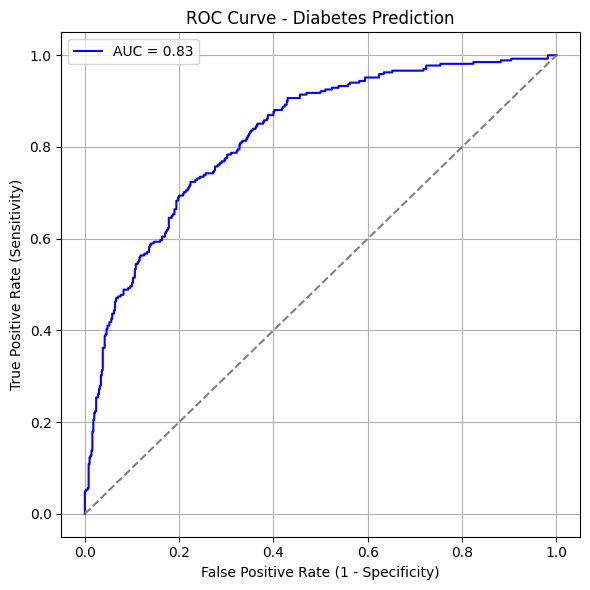

Threshold 0.4 — TN: 409, FP: 91, FN: 95, TP: 173
Sensitivity: 0.65
Specificity: 0.82


In [28]:
# STEP 8

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# ROC and AUC
fpr, tpr, thresholds = roc_curve(df['Outcome'], df['predicted_prob'])
auc_score = roc_auc_score(df['Outcome'], df['predicted_prob'])

# Plot ROC Curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve - Diabetes Prediction')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Adjust threshold to 0.4 and compare classification
df['predicted_0.4'] = df['predicted_prob'].apply(lambda x: 1 if x > 0.4 else 0)
conf_matrix_0_4 = confusion_matrix(df['Outcome'], df['predicted_0.4'])
TN2, FP2, FN2, TP2 = conf_matrix_0_4.ravel()
print(f"Threshold 0.4 — TN: {TN2}, FP: {FP2}, FN: {FN2}, TP: {TP2}")

# Sensitivity and Specificity at threshold 0.4
sensitivity_0_4 = TP2 / (TP2 + FN2)
specificity_0_4 = TN2 / (TN2 + FP2)

print(f"Sensitivity: {sensitivity_0_4:.2f}")
print(f"Specificity: {specificity_0_4:.2f}")

In [32]:
# STEP 9.

# Logistic regression summary for selected variables
def run_logit_and_report(vars_list):
    X = sm.add_constant(df[vars_list])
    model = sm.Logit(y, X).fit(disp=False)
    or_vals = model.params.apply(lambda x: round(np.exp(x), 2))
    p_vals = model.pvalues.round(5)
    return pd.DataFrame({'OR': or_vals, 'p-value': p_vals})

# BMI + Age
bmi_age = run_logit_and_report(['BMI', 'Age'])

# BMI + Pregnancies
bmi_preg = run_logit_and_report(['BMI', 'Pregnancies'])

# BMI + Glucose
bmi_gluc = run_logit_and_report(['BMI', 'Glucose'])

# Glucose + Pregnancies
gluc_preg = run_logit_and_report(['Glucose', 'Pregnancies'])

print("\nBMI + Age:")
print(bmi_age)
print("\nBMI + Pregnancies:")
print(bmi_preg)
print("\nBMI + Glucose:")
print(bmi_gluc)
print("\nGlucose + Pregnancies:")
print(gluc_preg)


BMI + Age:
         OR  p-value
const  0.00      0.0
BMI    1.10      0.0
Age    1.05      0.0

BMI + Pregnancies:
               OR  p-value
const        0.01      0.0
BMI          1.10      0.0
Pregnancies  1.16      0.0

BMI + Glucose:
           OR  p-value
const    0.00      0.0
BMI      1.08      0.0
Glucose  1.04      0.0

Glucose + Pregnancies:
               OR  p-value
const        0.00      0.0
Glucose      1.04      0.0
Pregnancies  1.13      0.0


In [36]:
# STEP 10

# Logistic regression summary for selected variables
def run_logit_and_report(vars_list):
    X = sm.add_constant(df[vars_list])
    model = sm.Logit(y, X).fit(disp=False)
    or_vals = model.params.apply(lambda x: round(np.exp(x), 2))
    p_vals = model.pvalues.round(5)
    return pd.DataFrame({'OR': or_vals, 'p-value': p_vals})

# BMI + glucose + pregnancies
bmi_gluc_preg = run_logit_and_report(['BMI', 'Glucose', 'Pregnancies'])

print("\nBMI + Glucose + Pregnancies:")
print(bmi_gluc_preg)


BMI + Glucose + Pregnancies:
               OR  p-value
const        0.00      0.0
BMI          1.08      0.0
Glucose      1.03      0.0
Pregnancies  1.15      0.0


In [50]:
# STEP 11

# Function 1: Test a single patient
def test_patient_risk(bmi, glucose, pregnancies):
    """
    Estimate the probability of diabetes for one individual.

    Inputs:
    - bmi: Body Mass Index (e.g., 27 for overweight)
    - glucose: Fasting glucose level (e.g., 120 for pre-diabetic)
    - pregnancies: Number of pregnancies (e.g., 1)

    Output:
    - Predicted diabetes probability as a formatted string
    """
    new_patient = pd.DataFrame([{
        'BMI': bmi,
        'Glucose': glucose,
        'Pregnancies': pregnancies
    }])

    new_patient = sm.add_constant(new_patient, has_constant='add')
    predicted_risk = model_multi.predict(new_patient)[0]
    return f"Predicted Probability of Diabetes: {predicted_risk:.1%}"

# Examples:
print(test_patient_risk(27, 120, 1))
print(test_patient_risk(35, 160, 4))

# Add line between outputs
print()

# Function 2: Test multiple patients at once
def test_multiple_patients(patients_list):
    """
    Estimate diabetes risk for multiple individuals.

    Input:
    - patients_list: A list of dictionaries with 'BMI', 'Glucose', and 'Pregnancies' values

    Output:
    - A DataFrame showing each profile and predicted probability
    """
    patients_df = pd.DataFrame(patients_list)
    patients_df = sm.add_constant(patients_df, has_constant='add') # adds intercept
    patients_df['Predicted Risk (%)'] = model_multi.predict(patients_df).apply(lambda x: round(x * 100, 1)) # adds each patient as a new column
    return patients_df.drop(columns='const') # cleans up output

# Examples:
example_patients = [
    {'BMI': 22, 'Glucose': 95,  'Pregnancies': 0},
    {'BMI': 30, 'Glucose': 130, 'Pregnancies': 2},
    {'BMI': 36, 'Glucose': 170, 'Pregnancies': 5}
]

print(test_multiple_patients(example_patients))

Predicted Probability of Diabetes: 15.6%
Predicted Probability of Diabetes: 67.8%

   BMI  Glucose  Pregnancies  Predicted Risk (%)
0   22       95            0                 4.4
1   30      130            2                27.6
2   36      170            5                78.7
